**<h1 style="font-size: 50px; font-weight: bold; color: #000000; font-family: 'Helvetica';">
 Customer Segmentation using RFM Analysis**
 </h1>

<h1 style="font-size: 30px;font-weight: bold; color: #000000;">Introduction</h1>


<h1 style="font-size: 15px; color: #000000;">Customer segmentation is a crucial part of any marketing strategy. By segmenting customers based on their behavior, businesses can tailor their marketing efforts to specific groups, improving customer retention and increasing sales. One effective method for customer segmentation is the RFM (Recency, Frequency, Monetary) analysis. RFM analysis helps identify customers who are most likely to respond to promotions by analyzing their purchase history.</h1>
<h1 style="font-size: 20px;font-weight: bold; color: #000000;">
RFM Analysis</h1>
<h1 style="font-size: 15px;font-weight: bold; color: #000000;">
RFM analysis categorizes customers based on three metrics:</h1>

<h1 style="font-size: 15px;font-weight: bold; color: #000000;">Recency:</h1> <h1 style="font-size: 15px;color: #000000;">How recently a customer made a purchase.</h1>
<h1 style="font-size: 15px;font-weight: bold; color: #000000;">Frequency:</h1> <h1 style="font-size: 15px;color: #000000;">How often a customer makes a purchase.</h1>
<h1 style="font-size: 15px;font-weight: bold; color: #000000;">Monetary Value:</h1> <h1 style="font-size: 15px;color: #000000;">How much money a customer has spent.</h1>

<h1 style="font-size: 20px;font-weight: bold; color: #000000;">Data Preparation</h1>
<h1 style="font-size: 15px;color: #000000;">
Before performing RFM analysis, it is crucial to prepare the dataset. This involves cleaning the data, converting columns to appropriate data types, and calculating necessary columns for the analysis.</h1>

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sales=pd.read_csv('C:/Users/vibin/Downloads/Online_retail.csv')

In [5]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
sales.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
sales.shape

(541909, 8)

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
sales.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
sales.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
sales["Description"]=sales["Description"].fillna('No Description')
sales=sales.dropna(subset=['CustomerID'])

In [12]:
sales.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
sales=sales.drop_duplicates()

In [43]:
sales.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
UnitPrice      float64
CustomerID      object
Country         object
totalprice     float64
dtype: object

In [47]:
sales['CustomerID'] = sales['CustomerID'].astype(str)

In [48]:
sales['InvoiceDate']=pd.to_datetime(sales['InvoiceDate'])

In [49]:
returns=sales[sales['Quantity']<0]
print(returns)

Empty DataFrame
Columns: [InvoiceDate, InvoiceNo, StockCode, Description, Quantity, UnitPrice, CustomerID, Country, totalprice]
Index: []


In [32]:
sales=sales[sales['Quantity']>=0]
print(sales)

                    InvoiceNo StockCode                          Description  \
InvoiceDate                                                                    
2022-12-01 08:26:00    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
2022-12-01 08:26:00    536365     71053                  WHITE METAL LANTERN   
2022-12-01 08:26:00    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
2022-12-01 08:26:00    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
2022-12-01 08:26:00    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...                       ...       ...                                  ...   
2023-12-09 12:50:00    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
2023-12-09 12:50:00    581587     22899         CHILDREN'S APRON DOLLY GIRL    
2023-12-09 12:50:00    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
2023-12-09 12:50:00    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
2023-12-09 12:50:00    581587     22138 

In [19]:

print(sales[sales['UnitPrice']<0])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


<h1 style="font-size: 20px;font-weight: bold; color: #000000;">Exploratory Data Analysis(EDA) Process</h1>

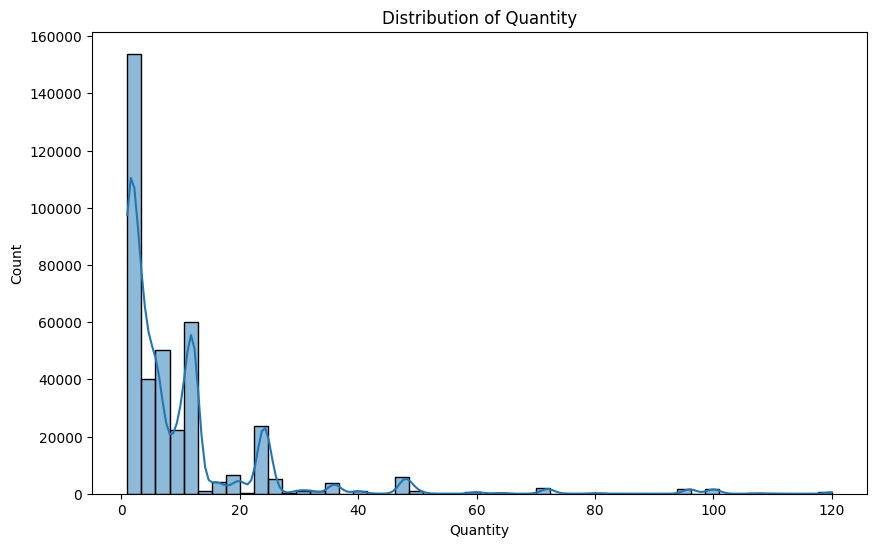

In [25]:
quantity_cutoff=sales['Quantity'].quantile(0.99)
filtered_retail1=sales[sales['Quantity']<=quantity_cutoff]

plt.figure(figsize=(10,6))
sns.histplot(filtered_retail1['Quantity'],bins=50,kde=True)
plt.xlim()
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

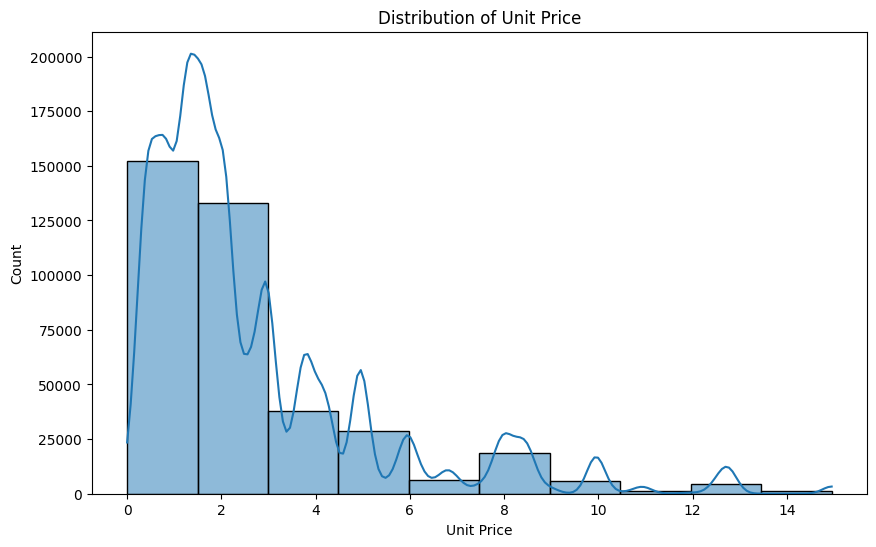

In [38]:
Price_cutoff=sales['UnitPrice'].quantile(0.99)
filtered_price=sales[sales['UnitPrice']<=Price_cutoff]

plt.figure(figsize=(10,6))
sns.histplot(filtered_price['UnitPrice'],bins=10,kde=True)
plt.xlim()
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Count')
plt.show()


In [50]:
sales['totalprice']=sales['Quantity']*sales['UnitPrice']

sales.set_index('InvoiceDate',inplace=True)
print(sales.head())

                    InvoiceNo StockCode                          Description  \
InvoiceDate                                                                    
2022-12-01 08:26:00    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
2022-12-01 08:26:00    536365     71053                  WHITE METAL LANTERN   
2022-12-01 08:26:00    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
2022-12-01 08:26:00    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
2022-12-01 08:26:00    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   

                     Quantity  UnitPrice CustomerID         Country  \
InvoiceDate                                                           
2022-12-01 08:26:00         6       2.55    17850.0  United Kingdom   
2022-12-01 08:26:00         6       3.39    17850.0  United Kingdom   
2022-12-01 08:26:00         8       2.75    17850.0  United Kingdom   
2022-12-01 08:26:00         6       3.39    17850.0  United Kingdom   
2022-12-01 08

Country
United Kingdom    3921
Germany             94
France              87
Spain               30
Belgium             25
Switzerland         21
Portugal            19
Italy               14
Finland             12
Austria             11
Name: CustomerID, dtype: int64


C:\Users\vibin\AppData\Local\Temp\ipykernel_58388\1740384986.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


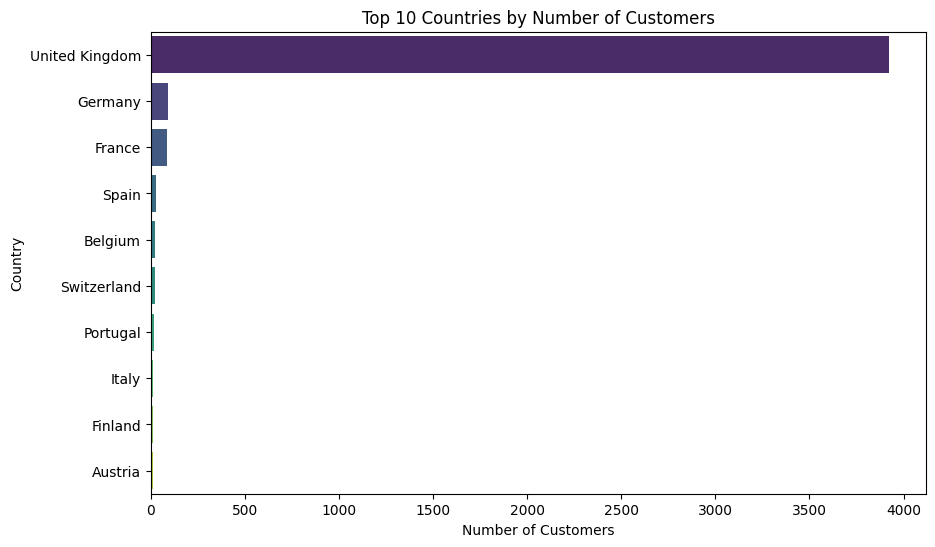

In [71]:
top_countries = sales.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head(10)
print(top_countries)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Customers')
plt.ylabel('Country')
plt.xlabel('Number of Customers')
plt.show()

In [72]:
monthly_sales=sales.resample('ME').sum()['totalprice']
plt.figure(figsize=(10,6))
monthly_sales.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('TotalSales')
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: totalprice, dtype: float64


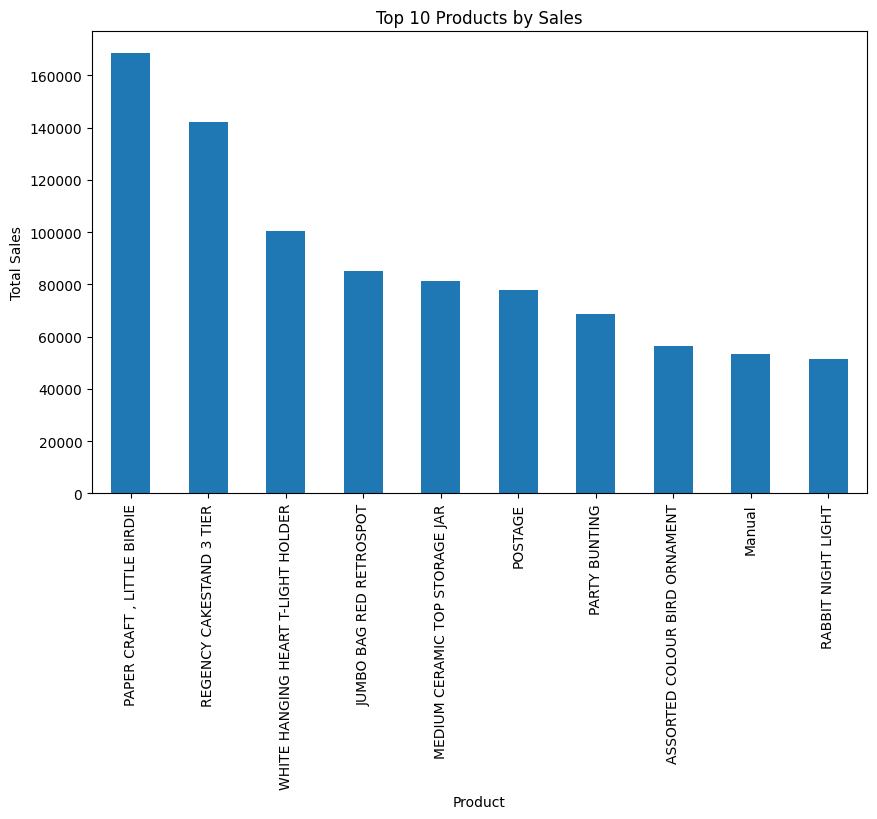

In [73]:
top_products = sales.groupby('Description')['totalprice'].sum().sort_values(ascending=False).head(10)
print(top_products)
plt.figure(figsize=(10,6))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

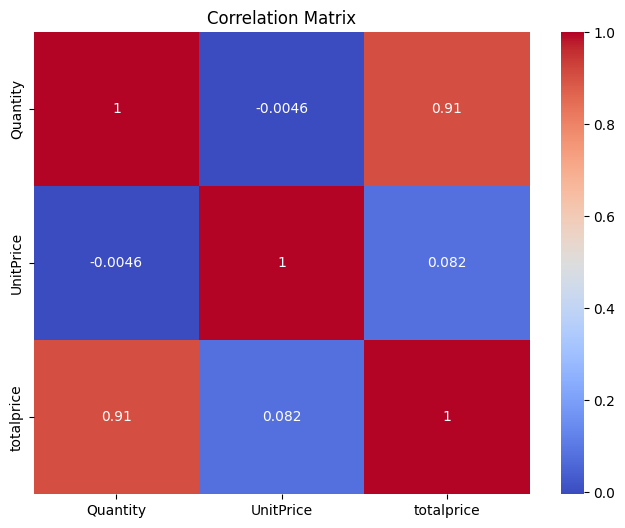

In [74]:
numeric_cols = sales.select_dtypes(include=[np.number]).columns
corr_matrix = sales[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [75]:
# Reset the index to make 'InvoiceDate' a column again
sales.reset_index(inplace=True)


In [76]:
now = sales['InvoiceDate'].max()
RFM = sales.groupby('CustomerID').agg({'InvoiceDate': lambda x: (now - x.max()).days, 'InvoiceNo': 'nunique', 'totalprice': 'sum'})
RFM.rename(columns={'InvoiceDate': 'Recency','InvoiceNo': 'Frequency','totalprice': 'Monetary'}, inplace=True)
RFM.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


In [77]:
def rfm_score(data,column,quantiles):
    return pd.qcut(data[column],q=quantiles,labels=False,duplicates='drop')+1

quantiles=5
RFM['R_score']=rfm_score(RFM,'Recency',quantiles)
RFM['F_score']=rfm_score(RFM,'Frequency',quantiles)
RFM['M_score']=rfm_score(RFM,'Monetary',quantiles)


RFM['RFM_Score'] = RFM['R_score'].astype(str)+RFM['F_score'].astype(str)+RFM['M_score'].astype(str)
RFM.head()


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,5,1,5,515
12347.0,1,7,4310.00,1,4,5,145
12348.0,74,4,1797.24,4,3,4,434
12349.0,18,1,1757.55,2,1,4,214
12350.0,309,1,334.40,5,1,2,512


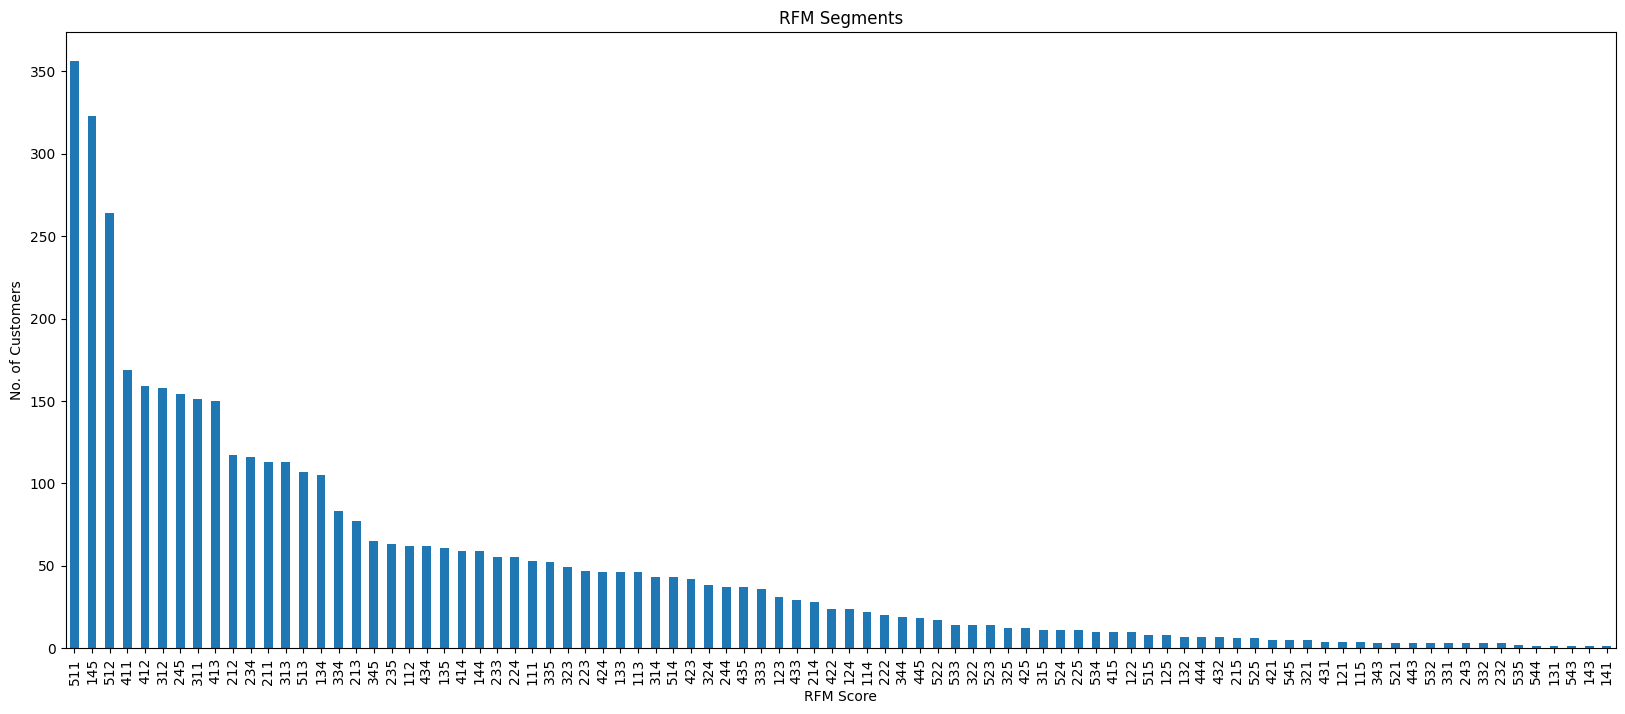

In [78]:

plt.figure(figsize=(20,8))
RFM['RFM_Score'].value_counts().plot(kind='bar')
plt.title('RFM Segments')
plt.xlabel('RFM Score')
plt.ylabel('No. of Customers')
plt.show()

In [79]:
RFM['RFMScore'] = RFM[['R_score', 'F_score', 'M_score']].sum(axis=1).astype(int)
segments = {
    'Best Customers': (RFM['RFMScore'] > 12),
    'Loyal Customers': (RFM['F_score'] == 5),
    'Big Spenders': (RFM['M_score'] == 5),
    'Almost Lost': (RFM['R_score'] == 1),
    'Lost Customers': (RFM['R_score'] == 1) & (RFM['F_score'] <= 2),
    'New Customers': (RFM['R_score'] == 5)
}

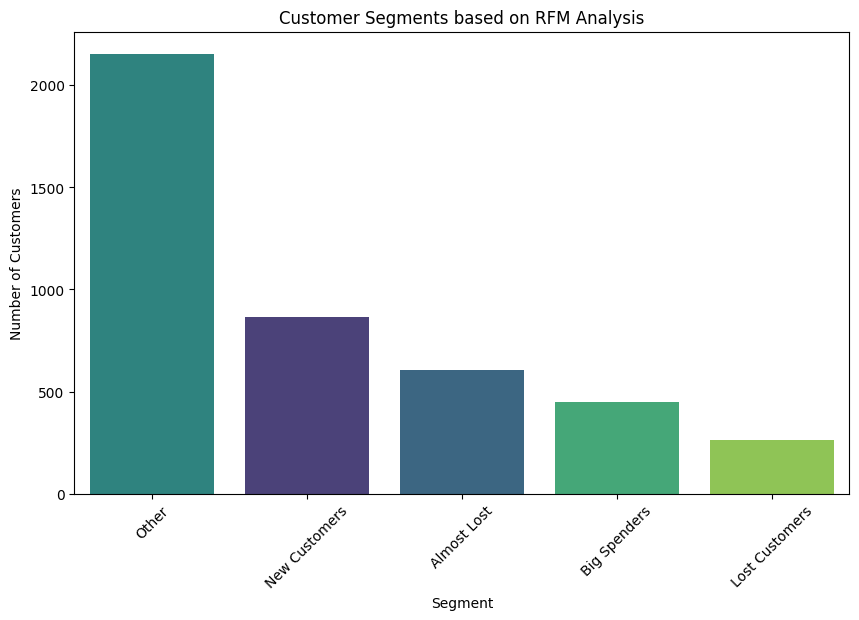

In [82]:
RFM['Segment'] = 'Other'
for segment, condition in segments.items():
    RFM.loc[condition, 'Segment'] = segment



# Visualize the segments
plt.figure(figsize=(10, 6))
sns.countplot(data=RFM, x='Segment', hue='Segment', order=RFM['Segment'].value_counts().index, palette='viridis', legend=False)
plt.title('Customer Segments based on RFM Analysis')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()